In [676]:
import numpy as np
from astropy.io import fits
from pylab import *

In [538]:
#!pip install dpkt scapy

In [539]:
import dpkt
import scapy

In [540]:
from scapy.all import *


In [541]:
from craco.cardcap import get_single_packet_dtype
nant = 30
npol = 2
samp_per_int = 64
samp_per_frame = 2048
int_per_frame = samp_per_frame // samp_per_int
nprod = nant*(nant+1)//2*npol # bug in nprod off by 1
dtype = get_single_packet_dtype(nprod, True)
packets_per_frame = int_per_frame * 36 * 4
dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (930, 2))])

In [542]:
last_ts = None
diffs = []
fout = open('packets.bin', 'wb')
fname = '/tmp/traces/tuesday_fixmeta_2.pcap'

fname = '/tmp/traces/tuesday_fixmeta_polsum_moreint.pcap'
fname = '/tmp/traces/tuesday_fixmeta_polsum_moreint.pcap'
fname = '/tmp/traces/tuesday_mettermeta.pcap'
fname = '/tmp/traces/wed_debug_2.pcap'
fname = '/tmp/traces/mp_thurs_2.pcap'
fname = '/tmp/traces/mp_wed_2.pcap'
fname = '/tmp/traces/mp_apr21_4.pcap'
fname = '/tmp/traces/mp_apr22_2.pcap'
fname = '/tmp/traces/mp_apr26_6.pcap' # Corr data gen
#fname = '/tmp/traces/mp_apr26_7.pcap' # DRX noise gen
#fname = '/tmp/traces/mp_apr27_2.pcap' # DRX noise gen, 4 BF banks
#fname = '/tmp/traces/mp_apr29_1.pcap'
fname = '/tmp/traces/mp_may2_1.pcap'
fname = '/tmp/traces/mp_may3_2.pcap'

f = open(fname, 'rb')
pcap = dpkt.pcap.Reader(f)

send_first_packet_number_in_wireshark = 1
for ipkt, (ts, buf) in enumerate(pcap):
    
    if last_ts is not None:
        diff = ts - last_ts
    else:
        diff = 0
        
    last_ts = ts
        
    #print(ipkt, str(datetime.datetime.utcfromtimestamp(ts)), len(buf), diff*1e6, buf[66:74])              
    eth = dpkt.ethernet.Ethernet(buf)
    diffs.append(diff)
    
    if len(buf) == 4166: # full size packet
        payload = buf[66:-4] # remove CRC
    else:
        payload = buf[66+4:-4] # With immediate adn remove CRC
        
    if ipkt >= send_first_packet_number_in_wireshark - 1: # first SEND_FIRST packet
        fout.write(payload)
                
    if ipkt == 50000:
        break
        
fout.close()

print(ipkt)

39999


npackets_per_frame=4608
23.87152777777778


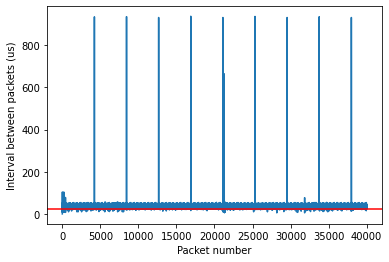

In [543]:
plot(np.array(diffs[:50000])*1e6)
xlabel('Packet number')
ylabel('Interval between packets (us)')
samp_per_frame = 2048
integ_interval = 64
nint_per_frame = samp_per_frame//integ_interval
npackets_per_frame = 36*4*nint_per_frame
print(f'npackets_per_frame={npackets_per_frame}')
expected_interval = 110e-3/npackets_per_frame
print(expected_interval*1e6)
axhline(expected_interval*1e6, c='r')
#ylim(0,100)

In [544]:
packets = np.fromfile('packets.bin', dtype=dtype)

In [545]:
packets[:16]['frame_id']

array([62705664, 62705728, 62705792, 62705856, 62705920, 62705984,
       62706048, 62706112, 62706176, 62706240, 62706304, 62706368,
       62706432, 62706496, 62706560, 62706624], dtype=uint64)

In [546]:
(packets['frame_id'][1:] - packets['frame_id'][:-1])[:1024]

array([                  64,                   64,                   64,
       ...,                   64,                   64,
       18446744073709549632], dtype=uint64)

Text(0, 0.5, 'frame_id')

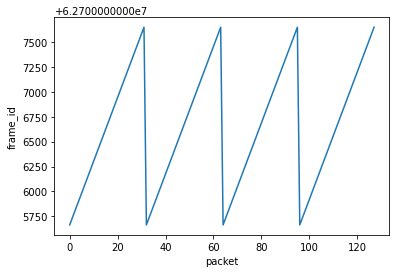

In [547]:
plot(packets['frame_id'][:nint_per_frame*4])
xlabel('packet')
ylabel('frame_id')


Text(0, 0.5, 'FrameID increment')

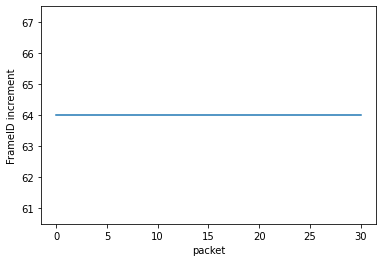

In [548]:
fid = packets['frame_id']
fdiff = fid[1:] - fid[0:-1]
off = nint_per_frame*12
plot(fdiff[off:nint_per_frame-1+off])
#print(fdiff[off:nint_per_frame+off])
#print(fid[off:32+off])
xlabel('packet')
ylabel('FrameID increment')


Text(0, 0.5, 'Message')

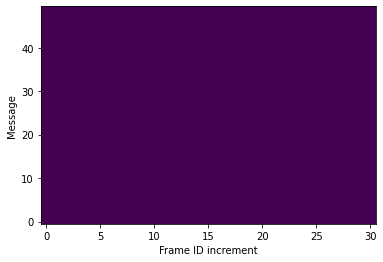

In [549]:
fdiff = fid[1:] - fid[0:-1]
#off = 32*30
fr = fdiff[:nint_per_frame*50].reshape(-1,nint_per_frame)
imshow(fr[:,:-1], aspect='auto', origin='lower', interpolation='none')
xlabel('Frame ID increment')
ylabel('Message')
#gcf().set_size_inches((12,10))

Text(0, 0.5, 'bat')

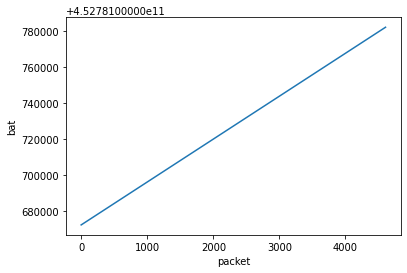

In [550]:
plot(packets['bat'][:npackets_per_frame-1])
xlabel('packet')
ylabel('bat')

4608


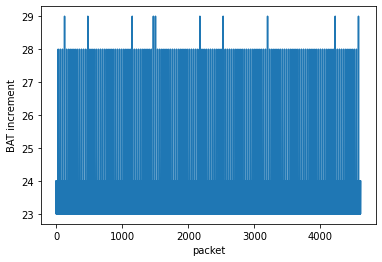

In [551]:
bat = packets['bat']
batdiff = bat[1:] - bat[:-1]
plot(batdiff[:npackets_per_frame-1])
#plot(batdiff[:500])
xlabel('packet')
ylabel('BAT increment')
print(npackets_per_frame)

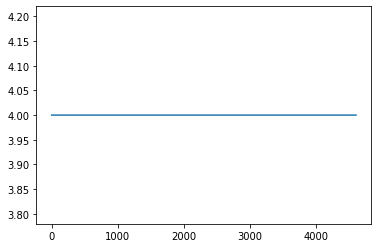

In [552]:
plot(packets['flags'][:npackets_per_frame-1])


In [553]:
dtype.itemsize

3752

In [554]:
32+930*4

3752

In [555]:
dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (930, 2))])

Text(0, 0.5, 'beam_number')

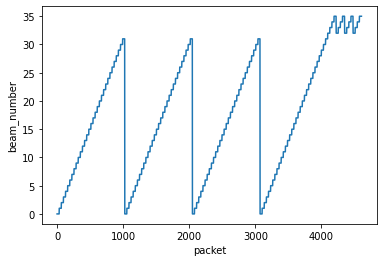

In [556]:
plot(packets['beam_number'][:npackets_per_frame])
xlabel('packet')
ylabel('beam_number')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


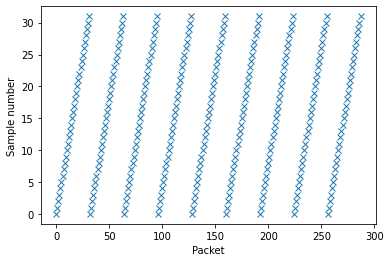

In [557]:
plot(packets['sample_number'][:npackets_per_frame//16],'x')
xlabel('Packet')
ylabel('Sample number')
print(packets['sample_number'][:16])
print(packets['sample_number'][16:32])
print(packets['sample_number'][32:48])

Text(0, 0.5, 'channel_number')

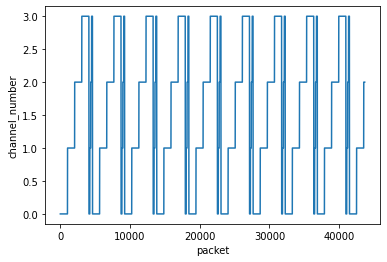

In [558]:
plot(packets['channel_number'])
xlabel('packet')
ylabel('channel_number')

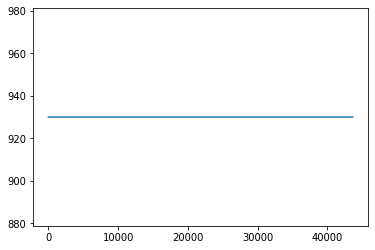

In [559]:
plot(packets['nprod'])

In [560]:
packets['data'].shape

(43667, 930, 2)

Text(0, 0.5, 'sample (beam/channel/time)')

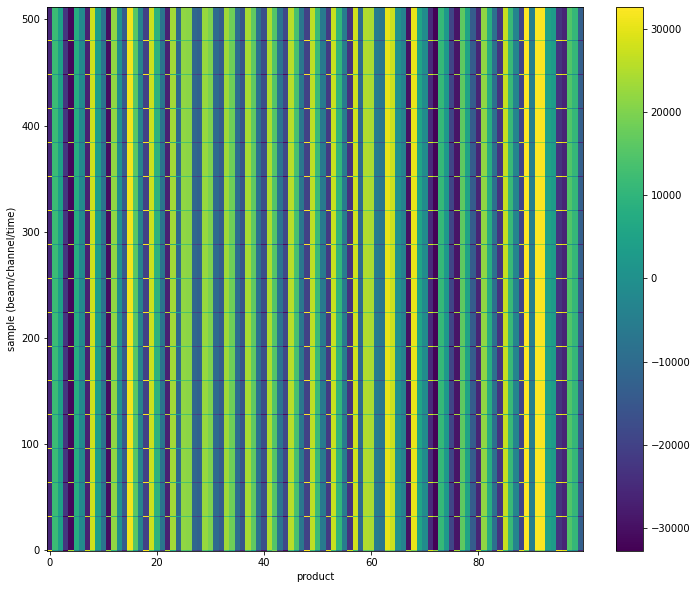

In [663]:
#imshow(packets['data'][:npackets_per_frame//32,:,0], origin='lower', aspect='auto', interpolation='none')
#integrations = tuple(range(0,npackets_per_frame,nint_per_frame))
integrations = tuple(range(0,nint_per_frame*16,1))
imshow(packets['data'][integrations,600:700,0], origin='lower', aspect='auto', interpolation='none')
#imshow(packets['data'][(1,65,129,193,257),:930,0], origin='lower', aspect='auto', interpolation='none')
colorbar()
gcf().set_size_inches([12,10])
xlabel('product')
ylabel('sample (beam/channel/time)')


Integration 0 baselines/products with errors: [228 246 264 425 443 461 624 642 749 767 858 911]
Integration 0 errors delta: [ 18  18 161  18  18 163  18 107  18  91  53]


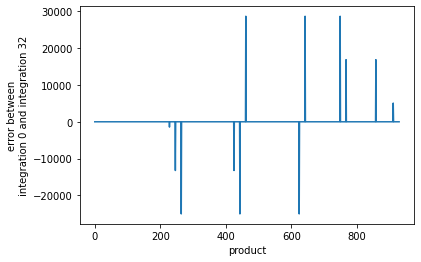

In [638]:
integrations = tuple(range(0,npackets_per_frame//16,nint_per_frame))
#plot(packets['data'][integrations,642,0])
intdiff = packets['data'][integrations[0],:,0] - packets['data'][integrations[1],:,0]
plot(intdiff)
xlabel('product')
ylabel('error between\nintegration 0 and integration %d' % nint_per_frame)
#(npackets_per_frame, nint_per_frame)
int0errors = np.where(intdiff!=0)[0]
print("Integration 0 baselines/products with errors: %s" % int0errors)
int0err_diff = int0errors[1:] - int0errors[:-1]
print("Integration 0 errors delta: %s" % int0err_diff)


(0, 32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800, 832, 864, 896, 928, 960, 992, 1024, 1056, 1088, 1120, 1152, 1184, 1216, 1248, 1280, 1312, 1344, 1376, 1408, 1440, 1472, 1504, 1536, 1568, 1600, 1632, 1664, 1696, 1728, 1760, 1792, 1824, 1856, 1888, 1920, 1952, 1984, 2016, 2048, 2080, 2112, 2144, 2176, 2208, 2240, 2272, 2304, 2336, 2368, 2400, 2432, 2464, 2496, 2528, 2560, 2592, 2624, 2656, 2688, 2720, 2752, 2784, 2816, 2848, 2880, 2912, 2944, 2976, 3008, 3040, 3072, 3104, 3136, 3168, 3200, 3232, 3264, 3296, 3328, 3360, 3392, 3424, 3456, 3488, 3520, 3552, 3584, 3616, 3648, 3680, 3712, 3744, 3776, 3808, 3840, 3872, 3904, 3936, 3968, 4000, 4032, 4064, 4096, 4128, 4160, 4192, 4224, 4256, 4288, 4320, 4352, 4384, 4416, 4448, 4480, 4512, 4544, 4576)


Text(0, 0.5, 'Integration diff\n(N+1)*32 - (N)*32')

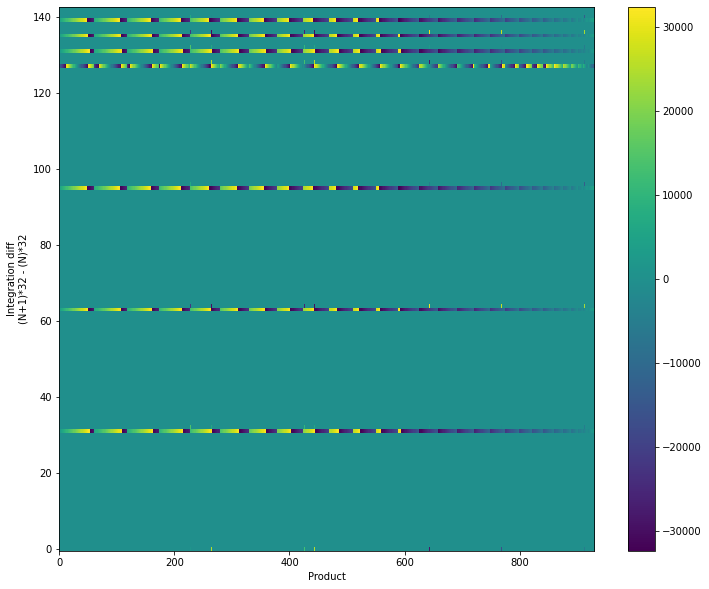

In [627]:
integrations = tuple(range(0,npackets_per_frame,nint_per_frame))
#integrations = tuple(range(0,nint_per_frame*66,nint_per_frame))
print(integrations)
#for (idx, integ) in enumerate(integrations):
#    print((idx, integ))
intdiff2d = packets['data'][integrations[1:],:,0] - packets['data'][integrations[:-1],:,0]
imshow(intdiff2d, origin='lower', aspect='auto', interpolation='none')
colorbar()
gcf().set_size_inches([12,10])
xlabel('Product')
ylabel('Integration diff\n(N+1)*%d - (N)*%d' % (nint_per_frame, nint_per_frame))

(0, 32, 64, 96, 128, 132, 136, 140)


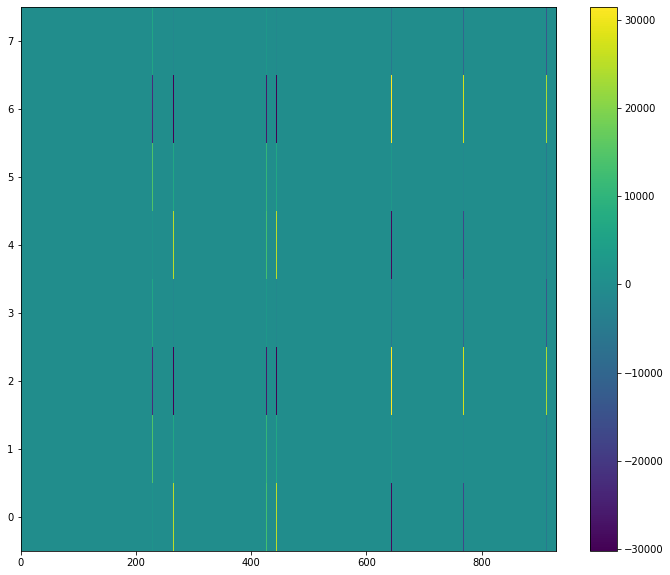

In [648]:
integrations = tuple(range(0,npackets_per_frame,nint_per_frame))
#print(integrations)
intdiff2d = packets['data'][integrations[1:],:,0] - packets['data'][integrations[:-1],:,0]

#diffidx = tuple(range(0,intdiff2d.shape[0],32))
diffidx = (0, 32, 64, 96, 128, 132, 136, 140)
print(diffidx)

imshow(intdiff2d[diffidx,:], origin='lower', aspect='auto', interpolation='none')
colorbar()
gcf().set_size_inches([12,10])
#xlabel('Product')
#ylabel('Integration diff\n(N+1)*%d - (N)*%d' % (nint_per_frame, nint_per_frame))

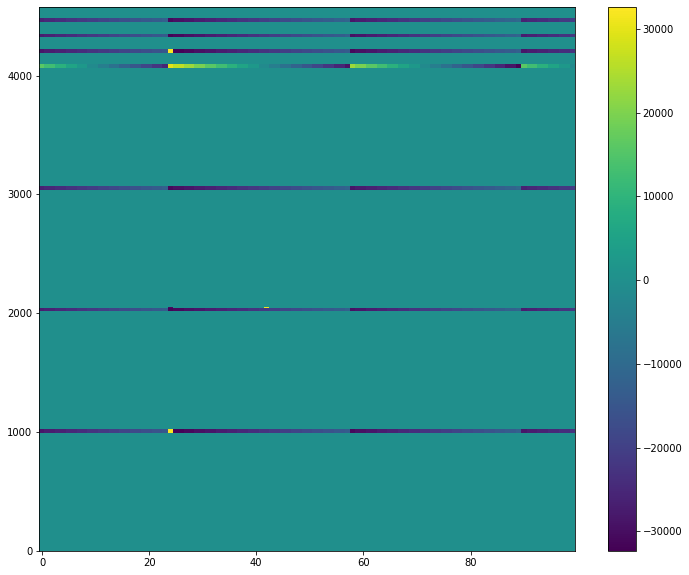

In [674]:
#integrations = tuple(range(0,npackets_per_frame,nint_per_frame))
#integrations = tuple(range(0,nint_per_frame*66,nint_per_frame))
#print(integrations)
#for (idx, integ) in enumerate(integrations):
#    print((idx, integ))
intdiff2d = packets['data'][nint_per_frame:nint_per_frame*144,600:700,0] - packets['data'][:nint_per_frame*143,600:700,0]
imshow(intdiff2d, origin='lower', aspect='auto', interpolation='none')
colorbar()
gcf().set_size_inches([12,10])
#xlabel('Product')
#ylabel('Integration diff\n(N+1)*%d - (N)*%d' % (nint_per_frame, nint_per_frame))

Things with nonzero real part 930
Things with nonzero imaginary part 0


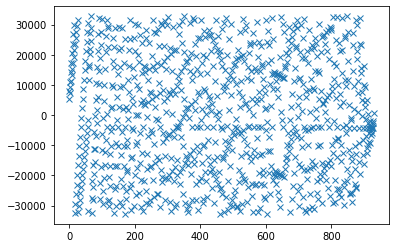

In [563]:
plot(packets['data'][0,:,0],'x')
print('Things with nonzero real part', np.sum(packets['data'][0,:,0]!=0))
print('Things with nonzero imaginary part', np.sum(packets['data'][0,:,1]!=0))
# antennas 4,5,6
# 1-1, 1-2, 1-3

In [564]:
dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (930, 2))])

In [565]:
real_idxs = np.where(packets['data'][0,:,0]!=0)[0]
print(real_idxs)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [566]:
imag_idxs = np.where(packets['data'][0,:,1]!=0)[0]
print(imag_idxs)

[]


In [567]:
nant = 30
npol = 2
antpol = nant*npol
addr = 0
addrmap = {}
for a1 in range(0, antpol, 2):
    for a2 in range(a1, antpol, 2):
        for p in range(2):
            addrmap[addr] = (a1//2+1, a2//2+1, p+1)
            addr += 1
        
#for addr in check_addr:
for addr in real_idxs:
    print(addr, addrmap[addr])


0 (1, 1, 1)
1 (1, 1, 2)
2 (1, 2, 1)
3 (1, 2, 2)
4 (1, 3, 1)
5 (1, 3, 2)
6 (1, 4, 1)
7 (1, 4, 2)
8 (1, 5, 1)
9 (1, 5, 2)
10 (1, 6, 1)
11 (1, 6, 2)
12 (1, 7, 1)
13 (1, 7, 2)
14 (1, 8, 1)
15 (1, 8, 2)
16 (1, 9, 1)
17 (1, 9, 2)
18 (1, 10, 1)
19 (1, 10, 2)
20 (1, 11, 1)
21 (1, 11, 2)
22 (1, 12, 1)
23 (1, 12, 2)
24 (1, 13, 1)
25 (1, 13, 2)
26 (1, 14, 1)
27 (1, 14, 2)
28 (1, 15, 1)
29 (1, 15, 2)
30 (1, 16, 1)
31 (1, 16, 2)
32 (1, 17, 1)
33 (1, 17, 2)
34 (1, 18, 1)
35 (1, 18, 2)
36 (1, 19, 1)
37 (1, 19, 2)
38 (1, 20, 1)
39 (1, 20, 2)
40 (1, 21, 1)
41 (1, 21, 2)
42 (1, 22, 1)
43 (1, 22, 2)
44 (1, 23, 1)
45 (1, 23, 2)
46 (1, 24, 1)
47 (1, 24, 2)
48 (1, 25, 1)
49 (1, 25, 2)
50 (1, 26, 1)
51 (1, 26, 2)
52 (1, 27, 1)
53 (1, 27, 2)
54 (1, 28, 1)
55 (1, 28, 2)
56 (1, 29, 1)
57 (1, 29, 2)
58 (1, 30, 1)
59 (1, 30, 2)
60 (2, 2, 1)
61 (2, 2, 2)
62 (2, 3, 1)
63 (2, 3, 2)
64 (2, 4, 1)
65 (2, 4, 2)
66 (2, 5, 1)
67 (2, 5, 2)
68 (2, 6, 1)
69 (2, 6, 2)
70 (2, 7, 1)
71 (2, 7, 2)
72 (2, 8, 1)
73 (2, 8, 2)
74 (2,

In [568]:
preal = packets['data'][0,:,0]
pimag = packets['data'][0,:,1]

print(np.unique(preal))
        
for addr in np.where(preal!=0)[0]:
    print(f'RAM address={addr} baseline/pol={addrmap[addr]} real={preal[addr]} imag={pimag[addr]}')


[-32761 -32731 -32685 -32524 -32461 -32351 -32273 -32195 -32180 -32149
 -32117 -32100 -32020 -31927 -31847 -31832 -31643 -31613 -31612 -31532
 -31391 -31284 -31281 -31031 -30936 -30588 -30572 -30525 -30449 -30432
 -30304 -30180 -30085 -30036 -30020 -30005 -30004 -29973 -29864 -29785
 -29663 -29612 -29516 -29469 -29407 -29311 -29281 -29076 -29063 -29060
 -29032 -29012 -28812 -28780 -28745 -28713 -28652 -28461 -28303 -28289
 -28240 -28116 -28083 -28036 -28020 -27988 -27941 -27927 -27913 -27896
 -27881 -27832 -27736 -27421 -27171 -27123 -27095 -27092 -27031 -27028
 -26824 -26780 -26508 -26368 -26277 -26228 -26196 -26161 -26148 -26099
 -26053 -26036 -26020 -25977 -25972 -25928 -25863 -25831 -25360 -25232
 -25077 -25075 -25043 -24935 -24665 -24528 -24527 -24399 -24276 -24228
 -24161 -24084 -24020 -23960 -23956 -23817 -23709 -23644 -23613 -23484
 -23468 -23452 -23123 -23076 -23011 -22980 -22933 -22891 -22855 -22824
 -22777 -22745 -22712 -22699 -22523 -22276 -22208 -22020 -22004 -22003
 -2199

930


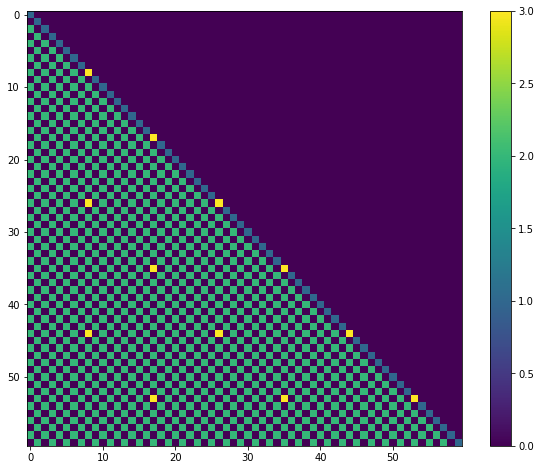

In [679]:
nant = 30
npol = 2
antpol = nant * npol
pgrid = np.zeros((antpol, antpol))
addr = 0

for a1 in range(0, antpol, 2):
    for a2 in range(a1, antpol, 2):
        for p in range(2):
#            if preal[addr] != 0:
#                pgrid[a2+p, a1+p] = 3
            if addr in int0errors:
                pgrid[a2+p, a1+p] = 3
            elif a2 == a1:
                pgrid[a2+p, a1+p] = 1
            else:
                pgrid[a2+p, a1+p] = 2
#            pgrid[a2+p, a1+p] = preal[addr]
            addr += 1

imshow(pgrid, interpolation='none')
colorbar()
gcf().set_size_inches((10,8))
print(addr)

In [570]:
preal.shape

(930,)

In [571]:
addrmap[7]

(1, 4, 2)

Text(0.5, 0, 'Integration number')

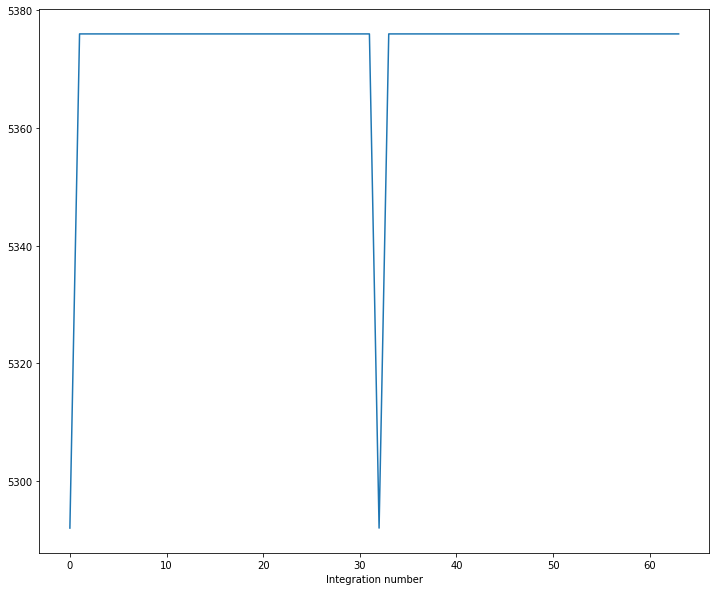

In [572]:
plot(packets['data'][:nint_per_frame*2,real_idxs[0],0])
gcf().set_size_inches((12,10))
xlabel('Integration number')

(144, 32)

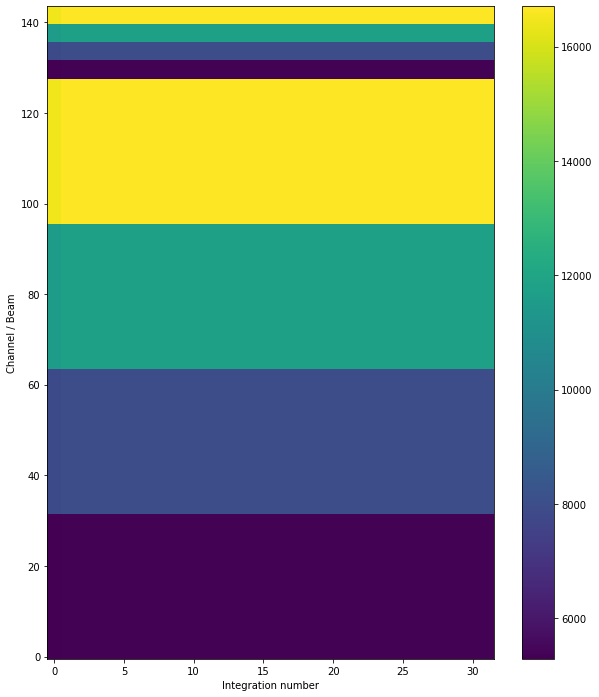

In [573]:
v = packets['data'][:nint_per_frame*36*4,real_idxs[0],0].reshape(-1,nint_per_frame)
imshow(v, aspect='auto', origin='lower', interpolation='none')
colorbar()
gcf().set_size_inches((10,12))
xlabel('Integration number')
ylabel('Channel / Beam')
v.shape

In [574]:
np.all(packets['zero2'] == 2004071455)

ValueError: no field of name zero2

In [ ]:

hist(preal[preal!=0], bins=1000)
print(len(np.unique(preal)))
print(np.unique(preal))
sum(preal!=0)


In [ ]:
for v in np.unique(preal):
    print(v, sum(preal==v))
    
